# Profile PreProcessing

## 1. Gray Filter
## 2. Cropping
## 3. Binary Inversion
## 4. Integration or Individuall OCR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
profile_path = './sample/profiles/'
profile_list = glob.glob(profile_path + '*.png')
for fn in profile_list:
    print(fn)

./sample/profiles\Screenshot_2020-07-17-19-21-52.png
./sample/profiles\Screenshot_2020-07-17-19-21-58.png
./sample/profiles\Screenshot_2020-07-17-19-22-05.png
./sample/profiles\Screenshot_2020-07-17-19-22-14.png
./sample/profiles\Screenshot_2020-07-17-19-22-20.png
./sample/profiles\Screenshot_2020-07-17-19-22-26.png
./sample/profiles\Screenshot_2020-07-17-19-22-33.png
./sample/profiles\Screenshot_2020-07-17-19-22-39.png
./sample/profiles\Screenshot_2020-07-17-19-22-45.png
./sample/profiles\Screenshot_2020-07-17-19-22-51.png
./sample/profiles\Screenshot_2020-07-17-19-22-57.png
./sample/profiles\Screenshot_2020-07-17-19-23-03.png
./sample/profiles\Screenshot_2020-07-17-19-23-10.png
./sample/profiles\Screenshot_2020-07-17-19-23-16.png
./sample/profiles\Screenshot_2020-07-17-19-23-22.png
./sample/profiles\Screenshot_2020-07-17-19-23-31.png
./sample/profiles\Screenshot_2020-07-17-19-23-37.png
./sample/profiles\Screenshot_2020-07-17-19-23-44.png
./sample/profiles\Screenshot_2020-07-17-19-23-

(720, 1280)


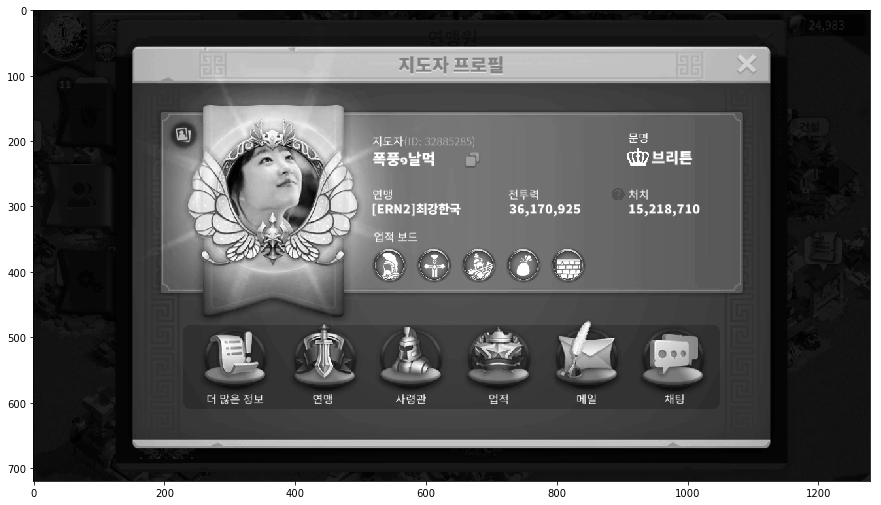

In [3]:
img = cv2.imread(profile_list[1],0)
print(img.shape)
plt.figure(figsize=(15,15))
plt.imshow(img, 'gray')
plt.show()

#### ID

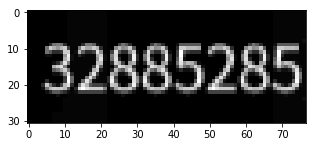

In [52]:
plt.figure(figsize=(5,5))
plt.imshow(img[185:216, 595:672], 'gray')
plt.show()

#### Power

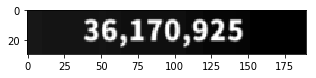

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(img[290:320, 690:880], 'gray')
plt.show()

#### kill

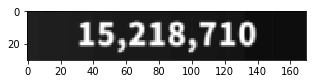

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(img[290:320, 880:1050], 'gray')
plt.show()

In [53]:
crop_dict = {
    'ID' : np.array([185, 216, 595, 672], dtype=int),
    'power' : np.array([290, 320, 690, 880], dtype=int),
    'kill' : np.array([290, 320, 880, 1050], dtype=int),
}

In [54]:
crop_dict

{'ID': array([185, 216, 595, 672]),
 'kill': array([ 290,  320,  880, 1050]),
 'power': array([290, 320, 690, 880])}

tesseract_path : C:\Users\ASUS\AppData\Local\Tesseract-OCR

In [55]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\ASUS\AppData\Local\Tesseract-OCR\tesseract.exe'

In [56]:
img_cv = cv2.imread('./sample/profiles/Screenshot_2020-07-17-19-21-52.png')
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

In [57]:
pytesseract.image_to_string(img[290:320, 880:1050])

'15,218,710'

In [58]:
crop_dict['ID']

array([185, 216, 595, 672])

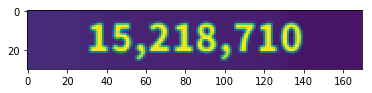

15,218,710


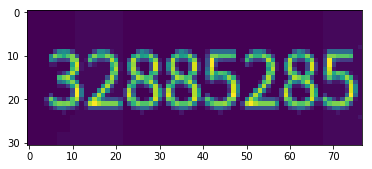

RV Itto ots


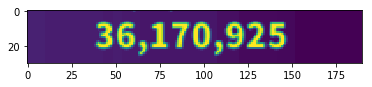

36,170,925


In [59]:
for key in crop_dict.keys():
    pos = crop_dict[key]
    tmp_img = img[pos[0]:pos[1], pos[2]:pos[3]]
    plt.imshow(tmp_img)
    plt.show()
    print(pytesseract.image_to_string(tmp_img))

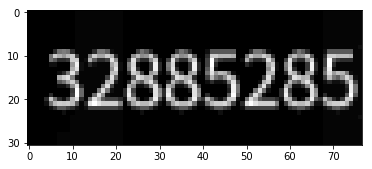

RV Itto ots


In [91]:
pos = crop_dict['ID']
tmp_img = img[pos[0]:pos[1], pos[2]:pos[3]]
plt.imshow(tmp_img, 'gray')
plt.show()
print(pytesseract.image_to_string(tmp_img))

In [36]:
pytesseract.image_to_string(tmp_img)

''

In [61]:
from PIL import Image

In [63]:
cv2

array([[118, 118, 118, ..., 119, 119, 119],
       [118, 118, 118, ..., 119, 119, 119],
       [118, 118, 118, ..., 119, 119, 119],
       ...,
       [118, 118, 118, ..., 119, 119, 119],
       [118, 118, 118, ..., 119, 119, 119],
       [118, 118, 118, ..., 119, 119, 119]], dtype=uint8)

In [68]:
print(np.max(tmp_img))
print(np.min(tmp_img))

169
118


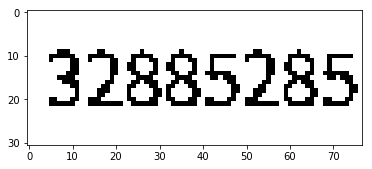

32885285


In [90]:
thr = 140
ret,thresh2 = cv2.threshold(tmp_img,thr,255,cv2.THRESH_BINARY_INV)
# png_name = file_path.split('\\')[-1]
# save_name = save_path + png_name[:-4] + "_BINARY_INV.png"
# print(save_name)
# cv2.imwrite(save_name, thresh2)
plt.imshow(thresh2, 'gray')
plt.show()
print(pytesseract.image_to_string(thresh2))

In [92]:
print(np.max(thresh2))
print(np.min(thresh2))

255
0
